In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import matplotlib.image as mpimg

# reference: pymche from GitHub and UCI ML Repository

In [9]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv') # load the data downloaded from UCI ML Repository
data = df

In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
Gender                                       2111 non-null object
Age                                          2111 non-null float64
Height                                       2111 non-null float64
Weight                                       2111 non-null float64
Family History with Overweight               2111 non-null object
Frequent consumption of high caloric food    2111 non-null object
Frequency of consumption of vegetables       2111 non-null int64
Number of main meals                         2111 non-null int64
Consumption of food between meals            2111 non-null object
Smoke                                        2111 non-null object
Consumption of water daily                   2111 non-null int64
Calories consumption monitoring              2111 non-null object
Physical activity frequency                  2111 non-null int64
Time using technology devices       

In [87]:
df.describe()

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.345968,0.093305,26.191172,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,3.000000,2.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [67]:
data = df
print (data.head(3))
print ("\n")
print ("list of attributes: ", list(data.columns))
print ("\n")
print ("total number of attributes: ", len(list(data.columns))-1)
print ("shape of datafrmae: ", data.shape)

   Gender   Age  Height  Weight Family History with Overweight  \
0  Female  21.0    1.62    64.0                            yes   
1  Female  21.0    1.52    56.0                            yes   
2    Male  23.0    1.80    77.0                            yes   

  Frequent consumption of high caloric food  \
0                                        no   
1                                        no   
2                                        no   

   Frequency of consumption of vegetables  Number of main meals  \
0                                       2                     3   
1                                       3                     3   
2                                       2                     3   

  Consumption of food between meals Smoke  Consumption of water daily  \
0                         Sometimes    no                           2   
1                         Sometimes   yes                           3   
2                         Sometimes    no                 

In [38]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']
# rename the columns to make it more informative, so that the exploratory analysis becomes more clear

In [39]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value))
# see the boundaries of key features

Frequency of consumption of vegetables : min: 1.0 max: 3.0
Number of main meals : min: 1.0 max: 4.0
Consumption of water daily : min: 1.0 max: 3.0
Physical activity frequency : min: 0.0 max: 3.0
Time using technology devices : min: 0.0 max: 2.0


In [41]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value), df[x].dtype)
    print(df[x].unique())

    # check the properties of categorical variables. min max values 
    # inside the [] are possible values of that categorical variable 

Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


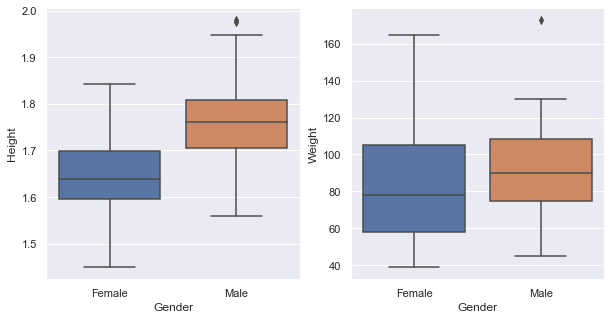

In [77]:
# check the statisticl properties of key features: Height and Weight
fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)
plt.show()

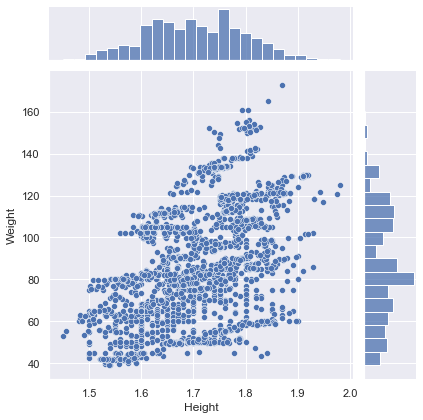

In [78]:
# test whether there is a linear relationship between height and weight
# in addition, show the statistical distributions
g = sns.jointplot(x="Height", y="Weight", data=df)

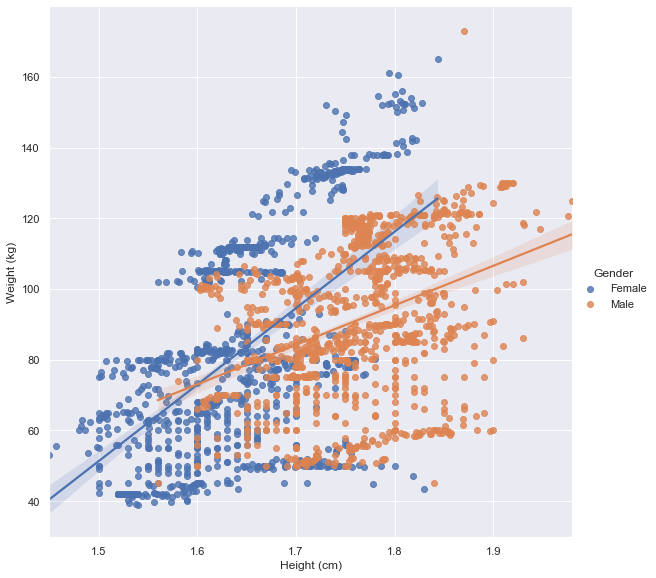

In [81]:
# based on the plot above, the linear relationship is not very clear. Try separate the samples by genders
g = sns.lmplot(x="Height", y="Weight", hue="Gender",
               height=8, data=df)
g.set_axis_labels("Height (cm)", "Weight (kg)")

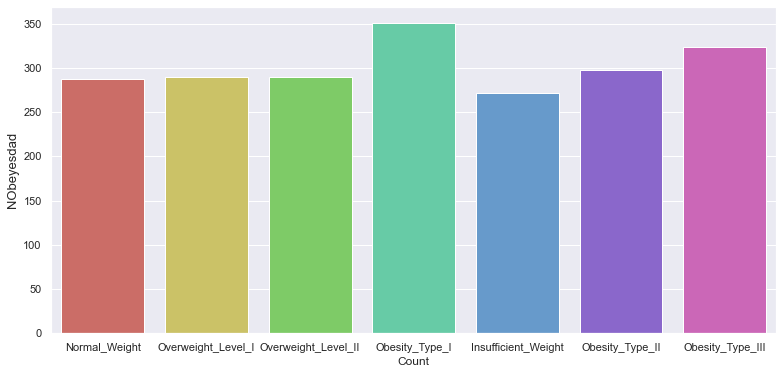

In [84]:
sns.set(rc={'figure.figsize':(13,6)})
sns.countplot(x = 'Obesity', data=df, palette='hls')
plt.xlabel('Count', fontsize=12)
plt.ylabel('NObeyesdad', fontsize=13)
plt.show()
# check the distribution of the objective feature by plotting the histogram

In [61]:
from collections import Counter
c = Counter(df['Obesity'])
print(c)

# examin the explicit number 

Counter({'Obesity_Type_I': 351, 'Obesity_Type_III': 324, 'Obesity_Type_II': 297, 'Overweight_Level_I': 290, 'Overweight_Level_II': 290, 'Normal_Weight': 287, 'Insufficient_Weight': 272})


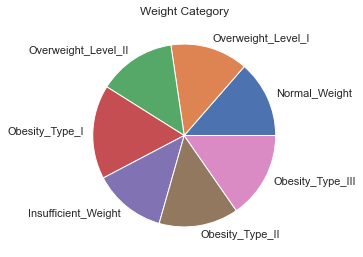

In [85]:
fig = plt.figure(figsize=(5,5))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category') 
plt.tight_layout()

In [86]:
# separate the data by genders and then see the distribution of obesity level
filt = df['Gender'] == 'Male'
c_m = Counter(df.loc[filt, 'Obesity'])
print(c_m,'\n')
c_f = Counter(df.loc[~filt, 'Obesity'])
print(c_f)

Counter({'Obesity_Type_II': 295, 'Obesity_Type_I': 195, 'Overweight_Level_II': 187, 'Normal_Weight': 146, 'Overweight_Level_I': 145, 'Insufficient_Weight': 99, 'Obesity_Type_III': 1}) 

Counter({'Obesity_Type_III': 323, 'Insufficient_Weight': 173, 'Obesity_Type_I': 156, 'Overweight_Level_I': 145, 'Normal_Weight': 141, 'Overweight_Level_II': 103, 'Obesity_Type_II': 2})


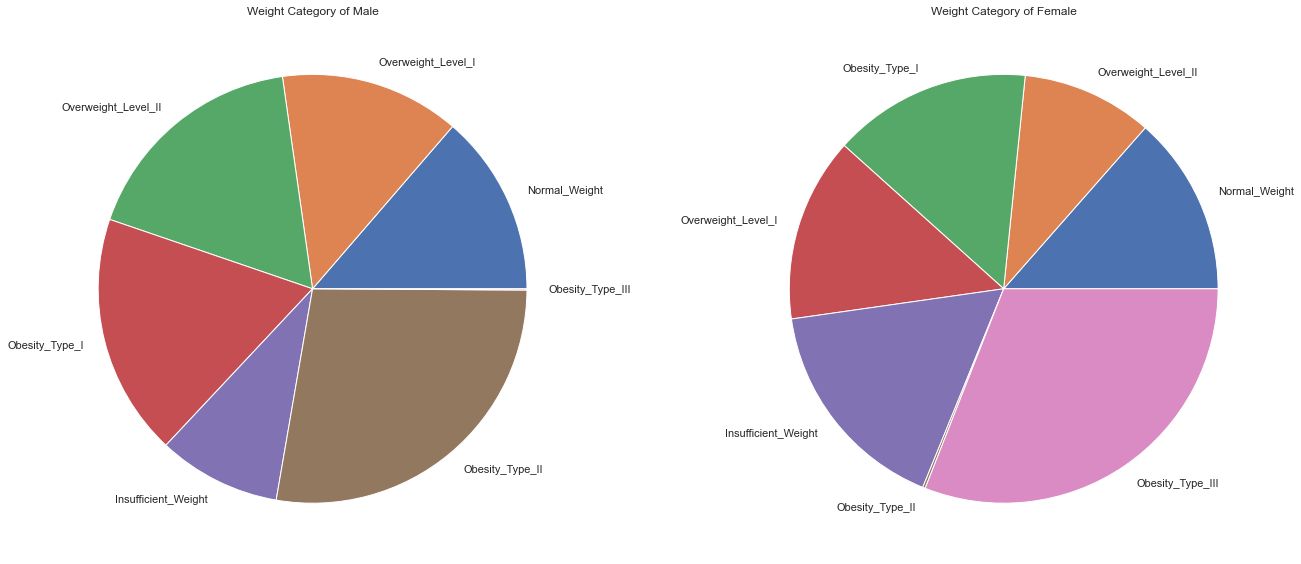

In [64]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male') 
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female') 
plt.tight_layout()

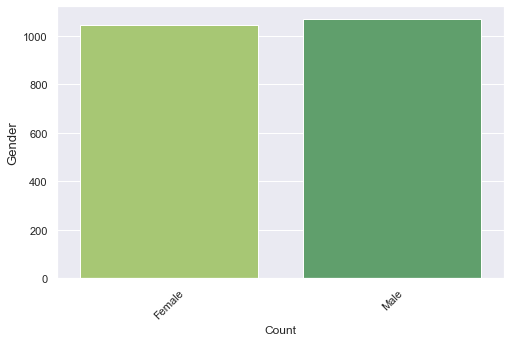

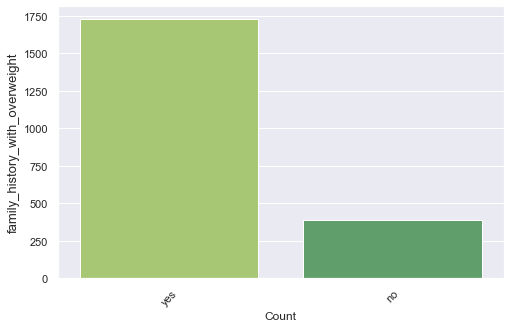

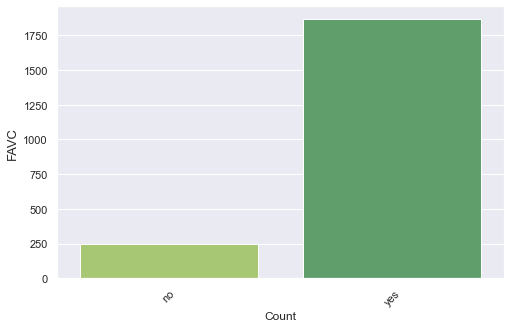

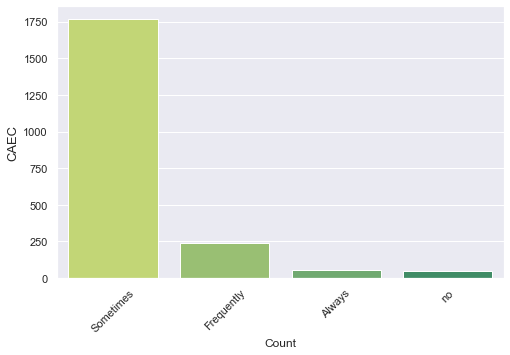

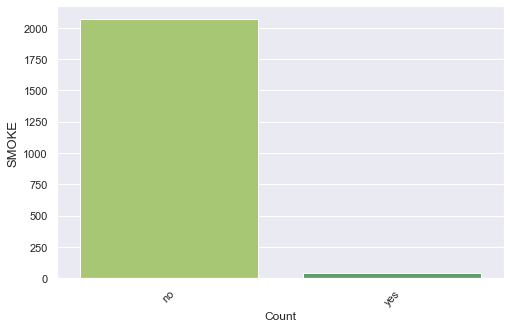

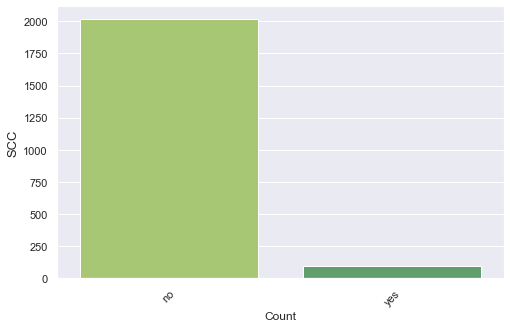

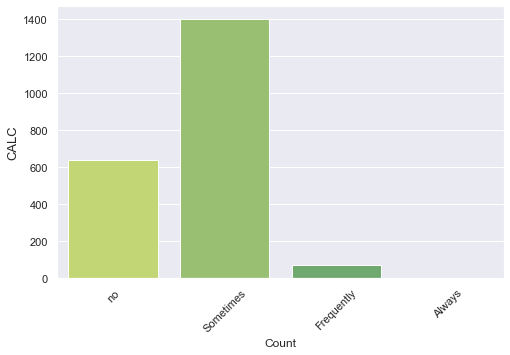

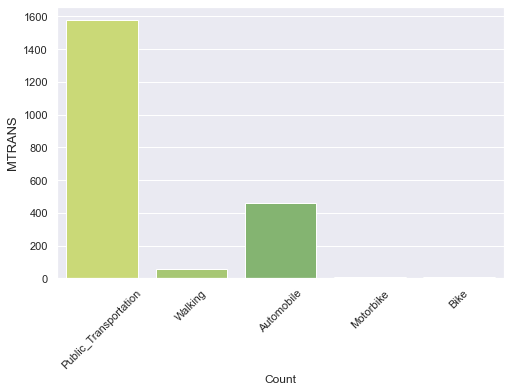

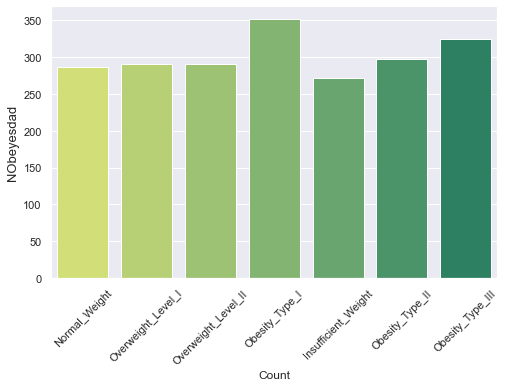

In [29]:
# plotting the histogram of categorical features and check their distribution
object_cols = data.columns[np.where(data.dtypes == 'object')]
# sns.set(rc={'figure.figsize':(4,5)})
for i in object_cols:
    sns.countplot(x=i, data=data, palette='summer_r')
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(i, fontsize=13)
    plt.xticks(rotation=45)
    plt.show()